# Kmeans Clustering
### Cluster lable를 구하면 기존 변수와 상관관계가 높아지게 되어 예측성능이 저하되기에 
- Cluster transform(거리)를 구해 (만약 cluster가 n개이면, 기존변수는 모두 버리고 n개의 변수(거리)로 예측)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
X_train.shape

(426, 30)

### 1. 원래 특성행렬로 지도학습

In [15]:
lgr = LogisticRegression(random_state=0)
print(f'원자료의 로지스틱 모형 예측 정확도는 {lgr.fit(X_train, y_train).score(X_test, y_test)}')

원자료의 로지스틱 모형 예측 정화도는 0.9230769230769231


### 2. 원래 특성행렬과 군집 label 변수로 지도학습
- 원자료(X_train)을 군집분석한 결과(cluster label)를 특성변수로 반영하여 로지스틱회귀분석으로 학습하여 예측한 결과
- 0.9230에서 0.944로 모형의 정확성이 증가하게 됨

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=17)
X_clusters = kmeans.fit_predict(X_train).reshape(-1, 1)

pd.DataFrame(X_clusters, columns=['클러스터']).head()

,클러스터
0,0
1,0
2,1
3,0
4,0


In [11]:
np.hstack([X_train, X_clusters])
print('\n')
np.hstack([X_train, X_clusters]).shape

array([[8.219e+00, 2.070e+01, 5.327e+01, ..., 3.322e-01, 1.486e-01,
        0.000e+00],
       [1.396e+01, 1.705e+01, 9.143e+01, ..., 3.068e-01, 7.957e-02,
        0.000e+00],
       [1.550e+01, 2.108e+01, 1.029e+02, ..., 3.003e-01, 1.048e-01,
        1.000e+00],
       ...,
       [1.026e+01, 1.222e+01, 6.575e+01, ..., 2.937e-01, 7.722e-02,
        0.000e+00],
       [1.290e+01, 1.592e+01, 8.374e+01, ..., 3.549e-01, 8.118e-02,
        0.000e+00],
       [1.242e+01, 1.504e+01, 7.861e+01, ..., 2.901e-01, 6.783e-02,
        0.000e+00]])

(426, 31)

In [16]:
lgr.fit(np.hstack([X_train, X_clusters]), y_train)
print('\n')
print(f'원자료와 군집lable을 입력변수로 로지스틱 모형 예측 정확도는 {lgr.score(np.hstack([X_test, kmeans.predict(X_test).reshape(-1, 1)]), y_test)}')

LogisticRegression(random_state=0)



원자료와 군집lable을 입력변수로 로지스틱 모형 예측 정확도는 0.9440559440559441


### 3. 원래 특성행렬과 군집간의 거리를 변수로 지도학습

In [17]:
X_clusters_distance = kmeans.fit_transform(X_train) # 인스턴스와 군집간 거리
distance = ['군집1_거리', '군집2_거리', '군집3_거리']
pd.DataFrame(X_clusters_distance, columns=distance).head()

lgr.fit(np.hstack([X_train, X_clusters_distance]), y_train)
print('\n')
print(f'원자료와 군집간 거리를 입력변수로 로지스틱 모형 예측 정확도는 {lgr.score(np.hstack([X_test, kmeans.transform(X_test)]), y_test)}')

,군집1_거리,군집2_거리,군집3_거리
0,460.810456,1492.436826,2856.187554
1,246.126672,788.934356,2155.525148
2,1193.675364,360.824967,1275.165189
3,177.948433,1211.961091,2578.850344
4,69.661908,1102.790002,2470.238122


LogisticRegression(random_state=0)



원자료와 군집간 거리를 입력변수로 로지스틱 모형 예측 정확도는 0.9440559440559441


아마도 원래 데이터와 소속 군집의 무게중심과의 거리는 상관관계가 있을 것이다.

In [18]:
col_names = load_breast_cancer()['feature_names'].tolist() + distance
data = pd.DataFrame(np.hstack([X_train, X_clusters_distance]), columns=col_names)
data.iloc[:, 25:].head()

,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,군집1_거리,군집2_거리,군집3_거리
0,0.43100,0.538100,0.07879,0.3322,0.14860,460.810456,1492.436826,2856.187554
1,0.32620,0.320900,0.13740,0.3068,0.07957,246.126672,788.934356,2155.525148
2,0.40020,0.421100,0.21340,0.3003,0.10480,1193.675364,360.824967,1275.165189
3,0.07348,0.004955,0.01111,0.2758,0.06386,177.948433,1211.961091,2578.850344
4,0.08862,0.114500,0.07431,0.2694,0.06878,69.661908,1102.790002,2470.238122


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 <a list of 33 Text major ticklabel objects>)

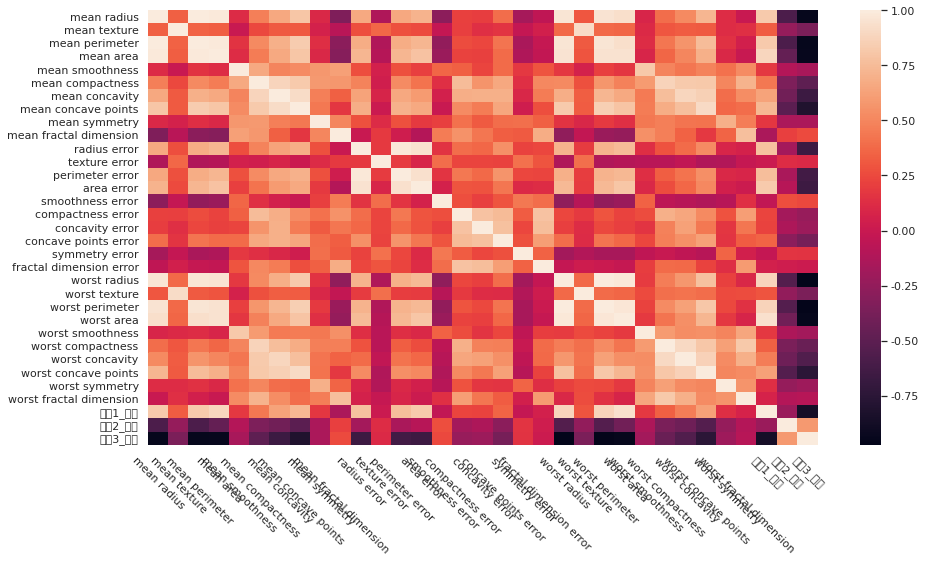

In [19]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
sns.heatmap(data.corr())
plt.xticks(rotation=-45)

### 군집간 거리 특성변수만으로 지도학습
- 원래 데이터와 군집간 거리와의 상관관계가 존재한다면

In [23]:
kmeans = KMeans(n_clusters=3, random_state=17)
X_clusters = kmeans.fit_transform(X_train)
pd.DataFrame(X_clusters).head()
lgr.fit(X_clusters, y_train)
print('\n')
print(f'원자료의 인스턴스와 클러스터의 거리를 입력변수로 로지스틱 모형 예측 정확도는 {lgr.score(kmeans.transform(X_test), y_test)}')

,0,1,2
0,460.810456,1492.436826,2856.187554
1,246.126672,788.934356,2155.525148
2,1193.675364,360.824967,1275.165189
3,177.948433,1211.961091,2578.850344
4,69.661908,1102.790002,2470.238122


LogisticRegression(random_state=0)



원자료의 인스턴스와 클러스터의 거리를 입력변수로 로지스틱 모형 예측 정확도는 0.951048951048951


### 아주 적은 변수로도 예측 성능이 높아지게 되었으며 K-means 방법론은 차원 축소알고리즘으로 사용이 가능
- model parsimony

### 다중공선성이 높은 변수를 제거하여 예측

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
0,75063.806341,mean radius
2,72638.083625,mean perimeter
20,11987.676355,worst radius
22,5120.454159,worst perimeter
3,2215.040959,mean area
23,1742.875718,worst area
9,1209.599724,mean fractal dimension
32,554.022525,군집3_거리
29,483.259001,worst fractal dimension
24,430.637882,worst smoothness


### VIF가 적은 변수만 입력변수로 모형에 투입

In [36]:
nf = vif.sort_values('VIF Factor', ascending=False).tail(10)['features'].to_list()
',  '.join(nf)

'worst concavity,  군집1_거리,  concave points error,  compactness error,  군집2_거리,  symmetry error,  fractal dimension error,  concavity error,  smoothness error,  texture error'

# Outliers?
<img src='https://images.unsplash.com/photo-1536303100418-985cb308bb38?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8b3V0bGllcnN8ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60'>
<img src='https://media.istockphoto.com/photos/feet-and-words-work-and-life-painted-on-road-picture-id517512816?b=1&k=20&m=517512816&s=170667a&w=0&h=XEYLSvv03J81xv--b_9q9GWZ2dftJWmYN6uHIIzXF-8='>

- k-means 알고리즘은 평균값 연산을 수행하기 때문에 이상치(아웃라이어)에 민감하다.
- k-medoids 알고리즘이다. k-medoids는 클러스터의 대표 값(medoids, representative)으로 모든 인스턴스 중에서 클러스터를 대표할 수 있는 가장 가까운 대표 인스턴스를 선출
- 대표로 뽑히지 않은 나머지 인스턴스(outliers)는 가장 가까운 클러스터에 배정

<img src='https://www.researchgate.net/publication/342871651/figure/fig1/AS:912165510864897@1594488613267/The-graphical-representation-of-the-difference-between-the-k-means-and-k-medoids.png'>

In [38]:
! pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

     |████████████████████████████████| 1.7 MB 3.2 MB/s 


In [42]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [48]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [49]:
from sklearn import preprocessing
df_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), columns=data.feature_names)
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [63]:
kmeans = KMeans(n_clusters = 3, random_state=1)
kmeans.fit_predict(df_scaled)

array([0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0,
       0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [53]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit_predict(df_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,

## 2차원 평면에서 주성분 2개로 시각화

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df_scaled)

reduced_pca = pd.DataFrame(data=x_pca, columns=['component 1', 'component 2'])
reduced_pca

,component 1,component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [72]:
reduced_pca['kmeans_label'] = KMeans(n_clusters = 3, random_state=1).fit_predict(df_scaled)
reduced_pca['kmedoids_label'] = KMedoids(n_clusters = 3, random_state=1).fit_predict(df_scaled)

In [73]:
reduced_pca

,component 1,component 2,kmeans_label,kmedoids_label
0,9.192837,1.948583,0,2
1,2.387802,-3.768172,0,2
2,5.733896,-1.075174,0,2
3,7.122953,10.275589,2,2
4,3.935302,-1.948072,0,2
...,...,...,...,...
564,6.439315,-3.576817,0,2
565,3.793382,-3.584048,0,2
566,1.256179,-1.902297,1,0
567,10.374794,1.672010,0,2


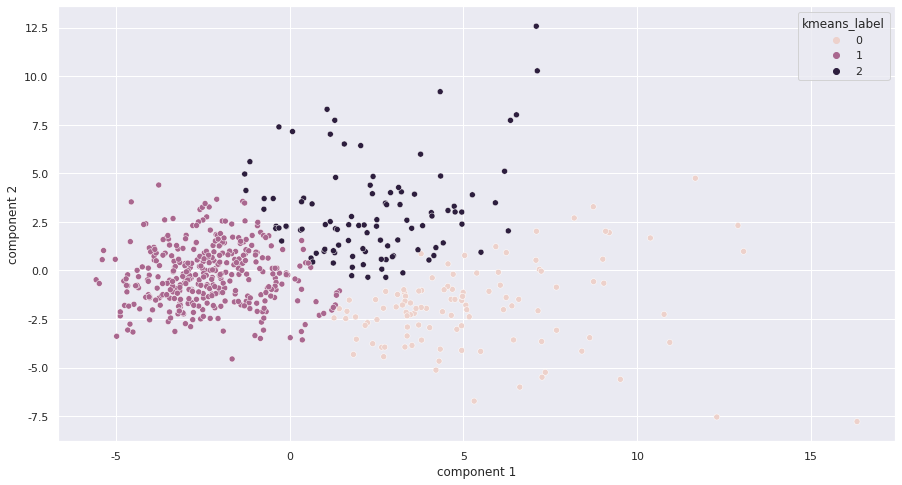

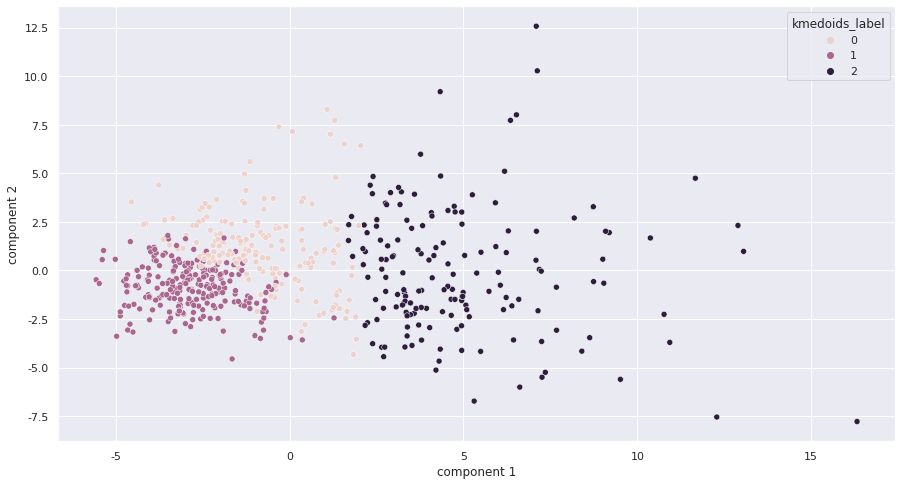

In [74]:
sns.scatterplot(data=reduced_pca, x="component 1", y="component 2", hue="kmeans_label")
plt.show()
sns.scatterplot(data=reduced_pca, x="component 1", y="component 2", hue="kmedoids_label")

## k-medoids, Partitioning Around Medoids (PAM)
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/K-Medoids_Clustering.gif/525px-K-Medoids_Clustering.gif'>

### K-medois 알고리즘은 outlier에 둔감(이상치를 별도로 clustering하지 않고 가까운 cluster에 통합)
- 고객 segmentation 전략에 따라 클러스터링 방법론 선택

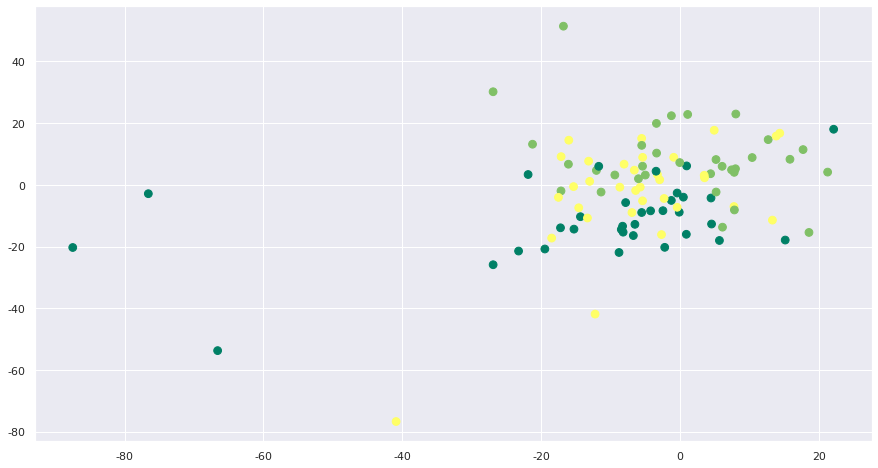

In [135]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=3, random_state=11, cluster_std=10) 
# oulter 무작위 생성 (10개)
np.random.seed(11)
X[np.random.choice(100,10)] = X[np.random.choice(100, 10)]*5
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='summer')

In [136]:
clusters_num = 2
clusters_num = 3

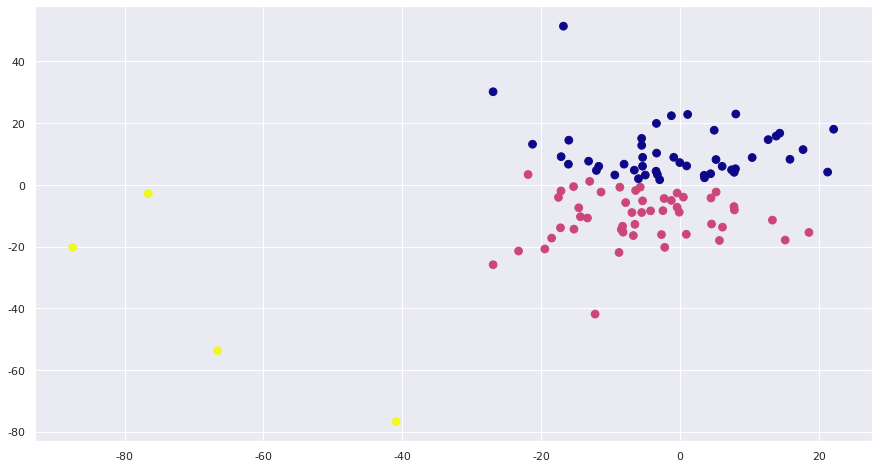

In [137]:
y_kmeans = KMeans(n_clusters = clusters_num, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='plasma')

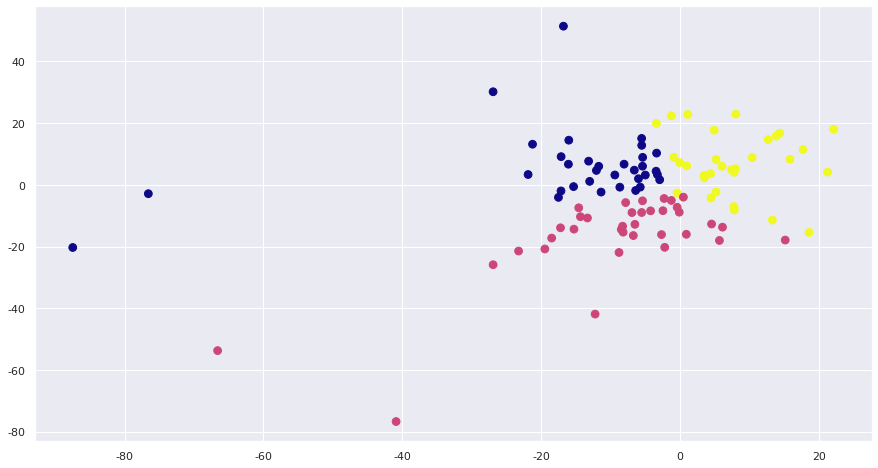

In [138]:
y_kmedoids = KMedoids(n_clusters = clusters_num, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c= y_kmedoids, s=60, cmap='plasma')

# End